In [2]:
'''
Unsupervised k-means clustering on plain text file versions of EEBO-TCP texts. 
The plain text files are generated by running stageOne.py 

Produces a user-specified number of clusters based on term frequency vectorization. 
These clusters are described using the keywords found in their corresponding entries 
in a metadata CSV file also made using stageOne.py 

The vectorize and cluster functions are adapted from the EarlyPrint Lab: 
    https://earlyprint.org/jupyterbook/unsupervised.html
The pca function is adapted from Ask Python: 
    https://www.askpython.com/python/examples/plot-k-means-clusters-python 
The topTerms function is adapted from 
    https://pythonprogramminglanguage.com/kmeans-text-clustering/ 
The optimalK function is adapted from Kajal Yadav's Medium article: 
    https://towardsdatascience.com/text-clustering-using-k-means-ec19768aae48
'''
import numpy as np
import pandas as pd
from collections import defaultdict,Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import our own utility functions 
from functions import remove_stopwords,getTexts,keywords


def vectorize(strings,ids):
    '''
    Vectorizes the texts and returns a dataframe of texts mapping to their TCP IDs. 
    '''
    # min document freq set to 2 to exclude words that only occur in a single text (limit num of features)
    
    # comment below is from EarlyPrint 
    # sublinear term frequency scaling takes the log of
    # term frequencies and can help to de-emphasize function words like pronouns and articles. 
    tfidf = TfidfVectorizer(min_df=2, sublinear_tf=True)

    # Comment this portion out if you choose to remove additional stopwords 
    # Most have already been removed in stageTwo processing 
    
    # processed = remove_stopwords(strings)
    # newStrings = []
    # for doc in processed:
    #     str = ' '.join(doc)
    #     newStrings.append(str)
    # results = tfidf.fit_transform(newStrings)

    results = tfidf.fit_transform(strings) #comment this out if you choose to remove stopwords 
    return pd.DataFrame(results.toarray(), index=ids, columns=tfidf.get_feature_names_out()) # Convert information back to a DataFrame

def pca(kmeans,df):
    '''
    PCA visualization code comes from https://www.askpython.com/python/examples/plot-k-means-clusters-python 
    '''
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(df)
    label = kmeans.fit_predict(pca_results)
    u_labels = np.unique(label)
    for i in u_labels:
        plt.scatter(pca_results[label == i , 0] , pca_results[label == i , 1] , label = i)
    plt.legend()
    plt.figure(figsize=(20,10))
    plt.show()

def cluster(df,ids,num):
    # Create a KMeans instance that will look for a specified number of clusters
    # Random_state parameter helps for reproducibility. 42 is a common choice 
    model = KMeans(n_clusters=num, random_state=42) 
    model.fit(df) 
    kmeans_groups = defaultdict(list)
    for k,v in zip(model.labels_,ids):
        kmeans_groups[k].append(v)
        
    for k,v in kmeans_groups.items():
        print(k, ': ',v)

    return kmeans_groups,model

def topTerms(model,df,num):
    print("Top terms per cluster:")
    centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = list(df.columns)
    for i in range(num):
        top = []
        print("Cluster %d:" % i)
        for ind in centroids[i, :10]:
            top.append(terms[ind])
            # print(' %s' % terms[ind])
        print(top)

def optimalK(model):
    '''
    Finds scores for each model (different values of k)
    Plots SSEs on a line chart to identify the elbow of the line, i.e., the optimal value of k
    '''
    num_clusters = range(1, 10)  # Range of possible clusters that can be generated
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in num_clusters] # Getting no. of clusters 

    score = [kmeans[i].fit(model).inertia_ for i in range(len(kmeans))] # Getting score corresponding to each cluster.
    
    plt.plot(num_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Method')
    plt.show()

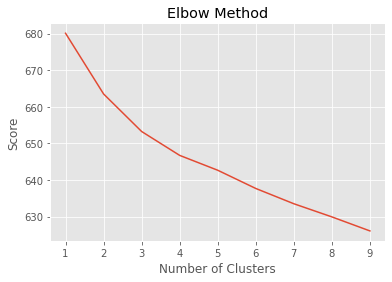

In [5]:
folder = '/srv/data/targetCorporaCorrected'
info = getTexts(folder)
df = vectorize(info[0],info[1])
optimalK(df)

In [25]:
k = 4 
df = vectorize(info[0],info[1])
groups,model = cluster(df,info[1],k)

2 :  ['A00201', 'A00268', 'A01749', 'A01932', 'A02494', 'A02655', 'A04813', 'A05601', 'A06817', 'A07605', 'A07886', 'A08052', 'A08166', 'A09899', 'A11788', 'A11831', 'A11842', 'A11884', 'A12458', 'A12460', 'A12466', 'A12596', 'A14510', 'A14803', 'A15069', 'A16221', 'A19313', 'A19859', 'A21083', 'A21108', 'A25867', 'A34856', 'A35994', 'A37432', 'A37936', 'A43513', 'A43537', 'A43543', 'A43544', 'A43548', 'A43550', 'A43552', 'A43556', 'A45999', 'A46841', 'A46842', 'A47317', 'A47319', 'A48714', 'A49991', 'A51598', 'A55497', 'A56021', 'A57347', 'A57355', 'A57360', 'A57367', 'A57374', 'A57391', 'A57453', 'A57465', 'A57483', 'A57518', 'A57525', 'A57589', 'A57590', 'A57605', 'A57617', 'A62162', 'A62165', 'A65185', 'A66847', 'A69046', 'A69149', 'A70942', 'A83297', 'A85817', 'A86296', 'A86306', 'A88366', 'A90869', 'A94198', 'A94783', 'B00052', 'B00963', 'A13128', 'A19029', 'A10368', 'A07512', 'A06935', 'A02826', 'A22171', 'A07516', 'A17074', 'A57517', 'A12615', 'A13574', 'A18694', 'A09213', 'A02

Top terms per cluster:
Cluster 0:
['man', 'if', 'see', 'love', 'yet', 'great', 'take', 'never', 'time', 'give']
Cluster 1:
['christ', 'church', 'god', 'man', 'apostle', 'holy', 'scripture', 'word', 'sin', 'doctrine']
Cluster 2:
['great', 'man', 'time', 'take', 'good', 'if', 'give', 'king', 'many', 'out']
Cluster 3:
['man', 'if', 'great', 'time', 'many', 'take', 'king', 'see', 'out', 'yet']


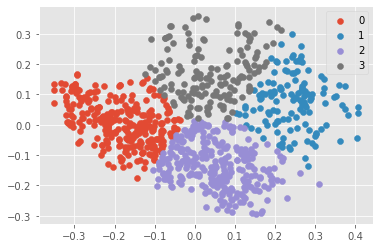

<Figure size 1440x720 with 0 Axes>

In [26]:
topTerms(model,df,k)
pca(model,df)

In [13]:
group2 = ['A00201', 'A00268', 'A01749', 'A01932', 'A02494', 'A02655', 'A04813', 'A05601', 'A06817', 'A07605', 'A07886', 'A08052', 'A08166', 'A09899', 'A11788', 'A11831', 'A11842', 'A11884', 'A12458', 'A12460', 'A12466', 'A12596', 'A14510', 'A14803', 'A15069', 'A16221', 'A19313', 'A19859', 'A21083', 'A21108', 'A25867', 'A34856', 'A35994', 'A37432', 'A37936', 'A43513', 'A43537', 'A43543', 'A43544', 'A43548', 'A43550', 'A43552', 'A43556', 'A45999', 'A46841', 'A46842', 'A47317', 'A47319', 'A48714', 'A49991', 'A51598', 'A55497', 'A56021', 'A57347', 'A57355', 'A57360', 'A57367', 'A57374', 'A57391', 'A57453', 'A57465', 'A57483', 'A57518', 'A57525', 'A57589', 'A57590', 'A57605', 'A57617', 'A62162', 'A62165', 'A65185', 'A66847', 'A69046', 'A69149', 'A70942', 'A83297', 'A85817', 'A86296', 'A86306', 'A88366', 'A90869', 'A94198', 'A94783', 'B00052', 'B00963', 'A13128', 'A19029', 'A10368', 'A07512', 'A06935', 'A02826', 'A22171', 'A07516', 'A17074', 'A57517', 'A12615', 'A13574', 'A18694', 'A09213', 'A02333', 'A02171', 'A02795', 'A68000', 'A12470', 'A07788', 'A13705', 'A68903', 'A03251', 'A10376', 'A01216', 'A10822', 'A05269', 'A20442', 'A18686', 'A01003', 'A03229', 'A16495', 'A05570', 'A04795', 'A15706', 'A17788', 'A19863', 'A03123', 'A02472', 'A22340', 'A01871', 'B16236', 'A16206', 'A04364', 'A00214', 'A10774', 'B01237', 'A12535', 'A71317', 'A09209', 'A09478', 'A15050', 'A33630', 'A07903', 'A11862', 'A68945', 'A15466', 'A01622', 'A78796', 'A68163', 'A14026', 'A20784', 'A09733', 'A74609', 'A14850', 'A15862', 'A20114', 'A34660', 'A67457', 'A73929', 'A22559', 'A11027', 'A10530', 'A00985', 'A09011', 'A02606', 'A78325', 'A00271', 'A21082', 'A16993', 'A05410', 'A11529', 'A08162', 'A06788', 'A02059', 'B00767', 'A12313', 'A01231', 'A68946', 'A14164', 'A12533', 'A69334', 'A69175', 'A02764', 'A16718', 'A68465', 'A38817', 'A22173', 'A67893', 'A02626', 'A08440', 'A09909', 'A08210', 'A10314', 'A22250', 'A12218', 'A37552', 'A13417', 'A11056', 'A72217', 'A00947', 'A07915', 'A72397', 'A12274', 'B14980', 'A11416', 'A03476', 'A06317', 'A07765', 'A03452', 'A16711', 'A08258', 'A00518', 'A73547', 'A16796', 'A13460', 'A09197', 'A16313', 'A67125', 'A22364', 'A08538', 'A04763', 'A08150', 'A10354', 'A07510', 'A05165', 'A01108', 'A19312', 'A16490', 'A32784', 'A73966', 'A14517', 'A12609', 'A08154', 'A14516', 'A67920', 'A14512', 'A08698', 'A03451', 'B00838', 'A14519', 'A12830', 'A01017', 'A36830', 'A20443', 'A68509', 'A12691', 'A21080', 'B00136', 'A10378', 'B00564', 'A21071', 'A12545', 'A30295', 'A10373', 'A69354', 'A14514', 'A73588', 'A20238', 'A13781', 'A10725', 'A22435', 'A01043', 'A14871', 'A16308', 'A13959', 'A14671', 'A09826', 'A11767', 'B14988', 'A19942', 'A22195', 'A69205', 'A16306', 'A13423', 'A09010', 'A00549', 'A04223', 'A10588', 'A04581', 'A01128', 'A05182', 'A22537', 'A68246', 'A22439', 'A20509', 'A06701', 'B09574', 'A14958', 'A13516', 'A03461', 'A17374', 'A06694', 'A09900', 'A12330', 'A02421', 'A10591', 'A14511', 'A13506', 'A14521', 'A22447', 'A10811', 'A51736', 'A19763', 'A12119', 'A16139', 'A00021', 'A22354', 'A22169', 'A02201', 'A03734', 'A15309', 'A59054', 'A35908', 'A21084', 'A15036', 'A14526', 'A07604', 'A69259', 'A01426', 'A14513', 'A14520', 'A03477', 'A13057', 'A03702', 'A17260', 'A22363', 'A22328', 'A22327', 'A14524', 'A11786', 'A16507', 'A78324', 'A10526', 'A14518', 'A19354', 'A34504', 'A10417', 'A10436', 'A10439', 'A10440', 'A34599', 'A34693', 'A34936', 'A68633']
group0 = ['A00823', 'A07081', 'A10294', 'A10803', 'A27888', 'A55490', 'A55492', 'A55493', 'A55496', 'A68799', 'A70839', 'A10402', 'A09221', 'A02053', 'A13802', 'A68114', 'A15606', 'A05589', 'A19383', 'A11991', 'A06456', 'A20083', 'A13481', 'B13519', 'A08452', 'A19158', 'A13499', 'A11612', 'A19644', 'A04555', 'A13521', 'A09038', 'A16457', 'A05590', 'A01836', 'A10362', 'A02262', 'A03217', 'A14249', 'A02645', 'A20081', 'A00825', 'A02836', 'A18407', 'A09194', 'A16469', 'A10411', 'A04942', 'A00529', 'A15140', 'A07246', 'A16564', 'A06678', 'A19443', 'A07313', 'A01989', 'A50034', 'A11472', 'A04560', 'A13410', 'A02227', 'A03250', 'A14041', 'A08687', 'A05599', 'A68144', 'A13524', 'A15662', 'A68191', 'A03116', 'A12773', 'A04564', 'A11133', 'A73532', 'A68435', 'A09202', 'A12578', 'A68133', 'A00826', 'A01839', 'A27982', 'A20811', 'A09039', 'A16552', 'A06891', 'A73472', 'A20836', 'A03404', 'B12182', 'A09203', 'A16923', 'A12787', 'A07176', 'A11254', 'A09204', 'A20448', 'A11474', 'A08659', 'A22071', 'A05598', 'A11434', 'A01793', 'A20076', 'A10438', 'B20736']
group1 = ['A10441', 'A10442', 'A10443', 'A10444', 'A10445', 'A10446', 'A11462', 'A13290', 'A13964', 'A14721', 'A16859', 'A18429', 'A18711', 'A20770', 'A30138', 'A43512', 'A43545', 'A43547', 'A43551', 'A43554', 'A43559', 'A45536', 'A46836', 'A55491', 'A72143', 'A75905', 'A77422', 'A85813', 'A86280', 'A86287', 'A86290', 'A86299', 'A86302', 'A86304', 'A90870', 'A90871', 'A90872', 'B02400', 'B03903', 'B07540', 'A01012', 'A34672', 'A16562', 'A18994', 'A13288', 'A10924', 'A37463', 'A68174', 'A09105', 'A11481', 'A04220', 'A04780', 'A04365', 'A18209', 'A16554', 'A02753', 'A12485', 'A16567', 'A01009', 'A07809', 'A10875', 'A19860', 'A57693', 'A13172', 'A29665', 'B08095', 'A19954', 'A12481', 'A00407', 'A02664', 'A08531', 'A47908', 'A19581', 'A01011', 'A31482', 'A19986', 'A47202', 'A01325', 'A01530', 'A19583', 'B13579', 'A07799', 'A19220', 'A09109', 'A15387', 'A17013', 'A02834', 'A02058', 'A17499', 'A08829', 'A03897', 'A13707', 'A19589', 'A13171', 'A20624', 'A02614', 'A08541', 'A12788', 'A12096', 'A10967', 'A10180', 'A15431', 'A05382', 'A03146', 'A68146', 'A03139', 'A01007', 'A19855', 'A07801', 'A00919', 'A17866', 'B07539', 'A12480', 'A15395', 'A10795', 'A03141', 'A14861', 'A07348', 'A01005', 'A13535', 'A11253', 'A02990', 'A75873', 'A10094', 'A17513', 'A19243', 'A71123', 'A18441', 'A20775', 'A10690', 'A04154', 'A69161', 'A01472', 'A07529', 'A10724', 'A01006', 'A72851', 'A16795', 'A19142', 'A19178', 'A13287', 'A00200', 'A20769', 'A63071', 'B07998', 'A06193', 'A10335', 'A93917', 'A08826', 'A68966', 'A04776', 'A13533', 'A12701', 'A02681', 'A04838', 'A16161', 'A07646', 'A13836', 'A72329', 'A19321', 'A19590', 'A17976', 'A19588', 'A06632', 'A68902', 'A01014', 'A19395', 'A70494', 'A01008', 'A08533', 'A13170', 'A00430', 'A01010', 'A01004', 'A11144', 'A19503', 'A13971', 'A16527', 'A34659', 'A34663', 'A34666', 'A34669', 'A34673', 'A34674', 'A34675', 'A34678', 'A34679', 'A34689', 'A68635', 'A71036', 'A80608', 'A80611', 'A80614', 'A80622', 'A80625', 'A80626', 'A80630', 'A80633', 'A80635', 'A80636', 'A80637', 'A80639', 'A80640', 'A84399', 'B20727', 'B20729']
group3 = ['A02324', 'A02495', 'A03065', 'A03144', 'A03149', 'A05237', 'A05597', 'A06137', 'A07768', 'A07769', 'A07834', 'A10357', 'A10821', 'A12718', 'A13294', 'A13821', 'A14722', 'A15033', 'A16309', 'A17981', 'A19072', 'A19368', 'A26262', 'A31106', 'A35147', 'A41427', 'A43507', 'A43514', 'A43524', 'A43528', 'A43531', 'A43533', 'A43535', 'A43553', 'A57329', 'A57532', 'A57652', 'A62166', 'A68617', 'A68619', 'A68764', 'A71305', 'A71306', 'A71307', 'A08874', 'A07883', 'A02239', 'A20847', 'A05370', 'A05074', 'A72473', 'A68132', 'A19476', 'A13173', 'A07466', 'A09195', 'A19622', 'A07894', 'A16282', 'A11408', 'A20983', 'A01395', 'A14194', 'A97352', 'A14916', 'A01095', 'A01342', 'A08017', 'A02464', 'A68197', 'A17808', 'A14028', 'A09208', 'A00617', 'A07448', 'A07267', 'A22507', 'A01403', 'A02750', 'A08536', 'A97346', 'A13043', 'A11931', 'A02775', 'A09169', 'A07559', 'A10743', 'A12317', 'A13042', 'A14293', 'A12461', 'A68659', 'A04391', 'A07439', 'A17810', 'A55555', 'A68944', 'A17958', 'A05569', 'A05594', 'A11383', 'A68445', 'A13830', 'A11516', 'B11307', 'A04393', 'A13049', 'A07363', 'A11863', 'A07680', 'A11954', 'A12598', 'A14770', 'A13053', 'A02858', 'A05412', 'A08239', 'A05339', 'A01864', 'A15408', 'A03411', 'A19232', 'A01512', 'A02848', 'A09741', 'A00580', 'A13415', 'A83496', 'A04194', 'A10389', 'A13217', 'A16286', 'B13659', 'A07225', 'A68463', 'A01115', 'A21106', 'A09500', 'A10231', 'A14292', 'A67927', 'A16482', 'A19602', 'A07628', 'A68475', 'A17140', 'A01764', 'A03066', 'A07415', 'A16489', 'A11467', 'A19211', 'A43598', 'A18974', 'A01364', 'A03096', 'A16264', 'A05289', 'A01160', 'A09569', 'A68283', 'A04112', 'A11395', 'A04911', 'A17848', 'A05184', 'A17832', 'A02484', 'A18028', 'A07280', 'A17310', 'A11878', 'A10668', 'A13980', 'A16853', 'A01991', 'A11493', 'A05105', 'A01811', 'A05335', 'A16275', 'A01161', 'A67926', 'A05751', 'A04863', 'A06471', 'A23464', 'A10228', 'A11464', 'A12824', 'A13820', 'A12738', 'A16248', 'A06134', 'A19179', 'A06425', 'A18501', 'A68202', 'A22928', 'A05331', 'A06786', 'A04390', 'A67922', 'A05094']
clusters = [group0,group1,group2,group3]
kw = [[],[],[],[]]
kwdict = keywords('/srv/data/metadata/tuning/spreadsheet.csv')
kwdict.update(keywords('/srv/data/metadata/tuning/people.csv'))
kwdict.update(keywords('/srv/data/metadata/tuning/EPtuning.csv'))
kwdict.update(keywords('/srv/data/metadata/tuning/keywords.csv'))
for idx,group in enumerate(clusters):
    for name in group: 
        kw[idx].extend(kwdict[name][0])

topics = [[],[],[],[]]
names = ['Group 0','Group 1','Group 2','Group 3']
readFile = open('/srv/data/targetTopics.txt','r')

for line in readFile:
    tcpID = line.split(':')[0]
    tcpID = tcpID.split('.')[0]
    topic = line.split(':')[1].strip()
    topic = topic.split(' ')
    for idx,group in enumerate(clusters):
        if tcpID in group: topics[idx].extend(topic) 

for idx, topicsList in enumerate(topics):
    common = Counter(topicsList).most_common(n=50)
    print(names[idx] + ' Topic Words: ' + str(common) + '\n')
    print('Keywords: '+ str(Counter(kw[idx]).most_common(n=20)) + '\n\n')


Group 0 Topic Words: [('see', 62), ('love', 45), ('good', 37), ('take', 30), ('give', 28), ('god', 26), ('king', 26), ('well', 23), ('lord', 22), ('death', 16), ('never', 16), ('still', 15), ('life', 13), ('world', 12), ('heart', 11), ('soul', 11), ('hand', 11), ('earth', 10), ('eye', 10), ('mind', 10), ('heaven', 9), ('fair', 9), ('praise', 8), ('find', 8), ('enter', 8), ('sweet', 7), ('knight', 7), ('prince', 7), ('bear', 7), ('live', 7), ('lady', 7), ('wife', 6), ('against', 5), ('die', 5), ('son', 5), ('tell', 5), ('name', 4), ('state', 4), ('blood', 4), ('psalm', 4), ('arm', 4), ('grace', 4), ('honour', 4), ('wit', 4), ('master', 4), ('high', 4), ('henry', 4), ('mean', 4), ('virtue', 4), ('country', 4)]

Keywords: [('Poetry', 16), ('Epigrams English', 9), ('Drama', 6), ('England', 5), ('History', 5), ('Bible', 3), ('Elizabeth', 3), ('Henry Frederick', 3), ('Prince of Wales', 3), ('Controversial literature', 2), ('Paraphrases English', 2), ('OT', 2), ('Conduct of life', 2), ('Plagu